In [27]:
# Load MNIST

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

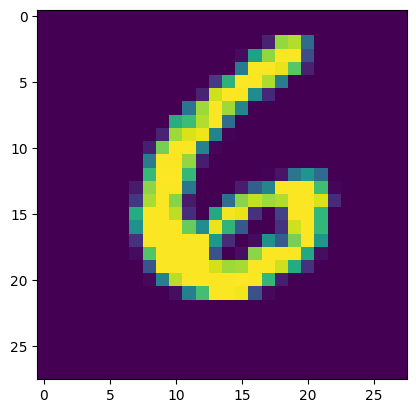

In [28]:
# Visualize the first input

import matplotlib.pyplot as plt

plt.imshow(X_train[90]);

In [29]:
# Create Adam Optimizer

from tensorflow.keras.optimizers import Adam

opt_1 = Adam(learning_rate=0.001)

In [30]:
X_train
lambda X_train: X_train / 255
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [31]:
# Base Model (Model 1)

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model_1 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(10, activation='softmax')])

model_1.compile(optimizer=opt_1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4713 - accuracy: 0.8762 - val_loss: 0.3058 - val_accuracy: 0.9156
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3041 - accuracy: 0.9152 - val_loss: 0.2794 - val_accuracy: 0.9231
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2840 - accuracy: 0.9202 - val_loss: 0.2728 - val_accuracy: 0.9247
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9238 - val_loss: 0.2678 - val_accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9251 - val_loss: 0.2667 - val_accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2622 - accuracy: 0.9267 - val_loss: 0.2649 - val_accuracy: 0.9267
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2583 - accuracy: 0.9281 - val_loss: 0.2663 - val_accuracy:

In [32]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.471338,0.876183,0.305836,0.9156
1,0.304115,0.915233,0.279374,0.9231
2,0.283950,0.920217,0.272809,0.9247
3,0.272840,0.923783,0.267774,0.9239
4,0.266839,0.925150,0.266692,0.9259
5,0.262217,0.926717,0.264922,0.9267
6,0.258335,0.928067,0.266279,0.9258
7,0.255301,0.929767,0.266417,0.9258
8,0.252773,0.930300,0.262171,0.9275
9,0.250488,0.930800,0.265388,0.9278


In [33]:
# Plot the loss curves
def accuracy(history):
  plt.plot(history_1.history['accuracy'])
  plt.plot(history_1.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

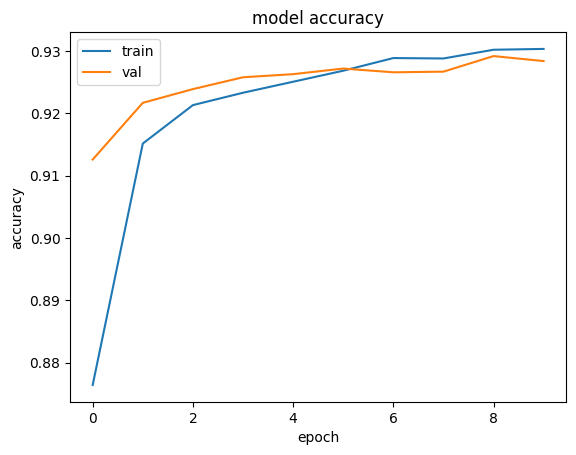

In [34]:
accuracy(history)

In [35]:
def loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

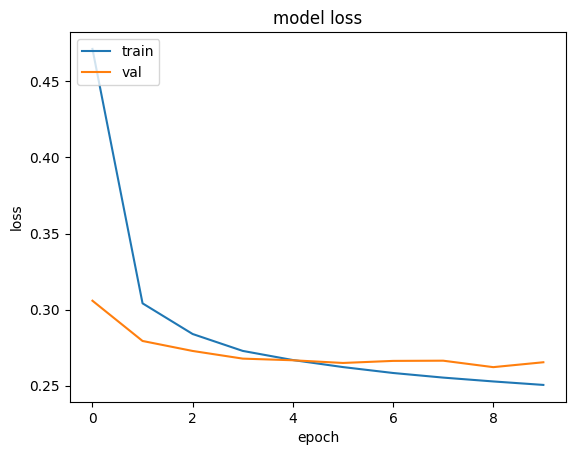

In [36]:
loss(history)

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_curve(history):
  # Create figure with secondary y-axis
  fig = make_subplots(specs=[[{"secondary_y": True}]])

  # Add traces
  fig.add_trace(
      go.Scatter( y=history.history['val_loss'], name="val_loss"),
      secondary_y=False,
  )

  fig.add_trace(
      go.Scatter( y=history.history['loss'], name="loss"),
      secondary_y=False,
  )

  fig.add_trace(
      go.Scatter( y=history.history['val_accuracy'], name="val accuracy"),
      secondary_y=True,
  )

  fig.add_trace(
      go.Scatter( y=history.history['accuracy'], name="accuracy"),
      secondary_y=True,
  )

  # Add figure title
  fig.update_layout(
      title_text="Loss/Accuracy of CNN Model"
  )

  # Set x-axis title
  fig.update_xaxes(title_text="Epoch")

  # Set y-axes titles
  fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
  fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

  fig.show()

In [41]:
plot_curve(history)

In [43]:
# Adding number of parameters (Model 2)

opt_2 = Adam(learning_rate=0.001)

model_2 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(32, activation='relu'),    #added another layer
                     layers.Dense(10, activation='softmax')])

model_2.compile(optimizer=opt_2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3481 - accuracy: 0.9036 - val_loss: 0.2133 - val_accuracy: 0.9376
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1834 - accuracy: 0.9469 - val_loss: 0.1632 - val_accuracy: 0.9523
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1450 - accuracy: 0.9569 - val_loss: 0.1404 - val_accuracy: 0.9587
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1230 - accuracy: 0.9636 - val_loss: 0.1300 - val_accuracy: 0.9609
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1075 - accuracy: 0.9683 - val_loss: 0.1220 - val_accuracy: 0.9638
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0952 - accuracy: 0.9713 - val_loss: 0.1190 - val_accuracy: 0.9632
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0858 - accuracy: 0.9740 - val_loss: 0.1109 - val_accur

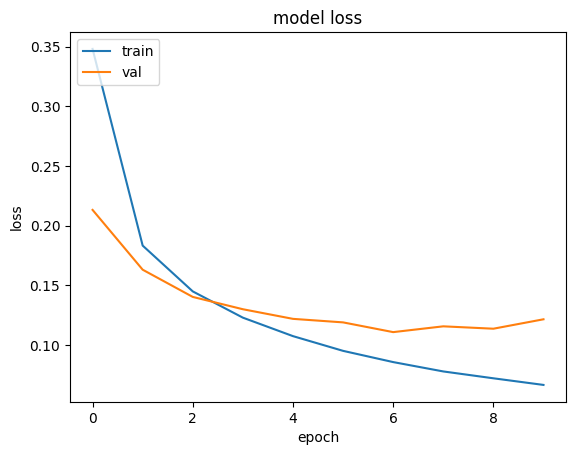

In [44]:
loss(history)

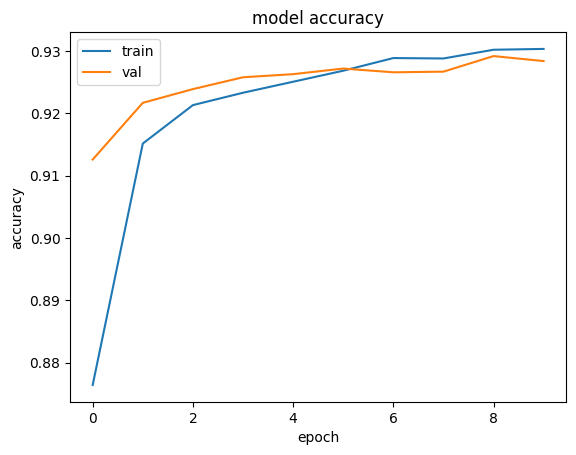

In [45]:
accuracy(history)

In [46]:
plot_curve(history)

In [47]:
# Increasing the learning rate (Model 3)

opt_3 = Adam(learning_rate=0.00001)   #lr inceased from 0.001 to 0.00001

model_3 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_3.compile(optimizer=opt_3, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0304 - accuracy: 0.3386 - val_loss: 1.6963 - val_accuracy: 0.5984
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4545 - accuracy: 0.6772 - val_loss: 1.2197 - val_accuracy: 0.7555
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0868 - accuracy: 0.7731 - val_loss: 0.9313 - val_accuracy: 0.8109
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8619 - accuracy: 0.8161 - val_loss: 0.7544 - val_accuracy: 0.8403
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7201 - accuracy: 0.8391 - val_loss: 0.6414 - val_accuracy: 0.8591
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6258 - accuracy: 0.8544 - val_loss: 0.5651 - val_accuracy: 0.8732
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5602 - accuracy: 0.8658 - val_loss: 0.5111 - val_accuracy:

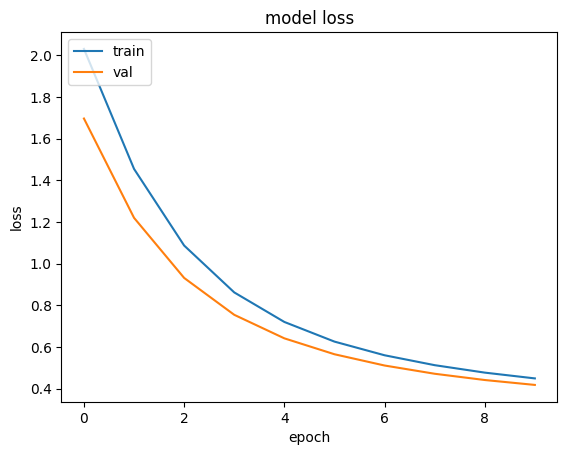

In [48]:
loss(history)

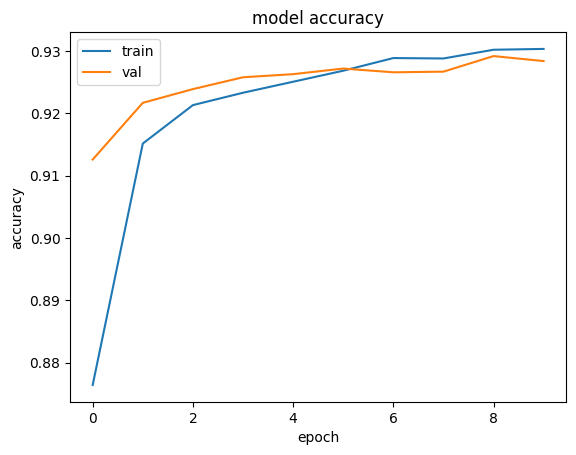

In [49]:
accuracy(history)

In [50]:
plot_curve(history)

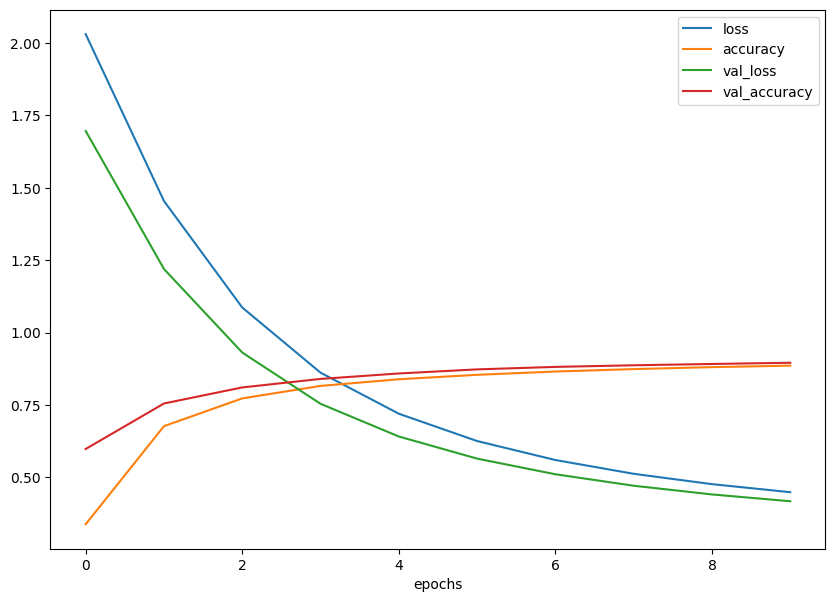

In [51]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

In [52]:
# Greatly add number of parameters (Model 4)

opt_4 = Adam(learning_rate=0.001)

model_4 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_4.compile(optimizer=opt_4, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_4.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2310 - accuracy: 0.9323 - val_loss: 0.1118 - val_accuracy: 0.9649
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0986 - accuracy: 0.9701 - val_loss: 0.0845 - val_accuracy: 0.9729
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0695 - accuracy: 0.9780 - val_loss: 0.0922 - val_accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0522 - accuracy: 0.9830 - val_loss: 0.1096 - val_accuracy: 0.9690
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0407 - accuracy: 0.9864 - val_loss: 0.0851 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0327 - accuracy: 0.9890 - val_loss: 0.0941 - val_accuracy: 0.9733
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0300 - accuracy: 0.9899 - val_loss: 0.0867 - val_accura

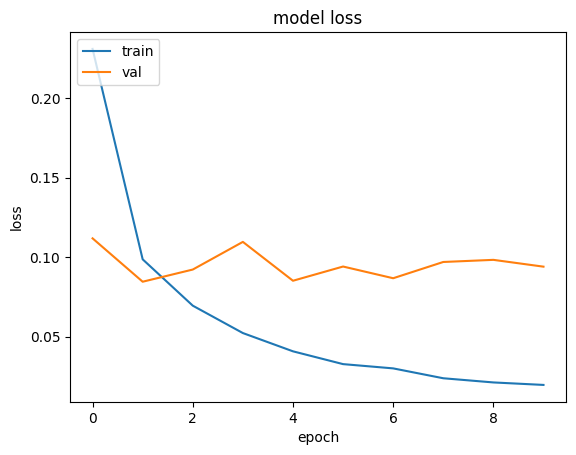

In [53]:
loss(history)

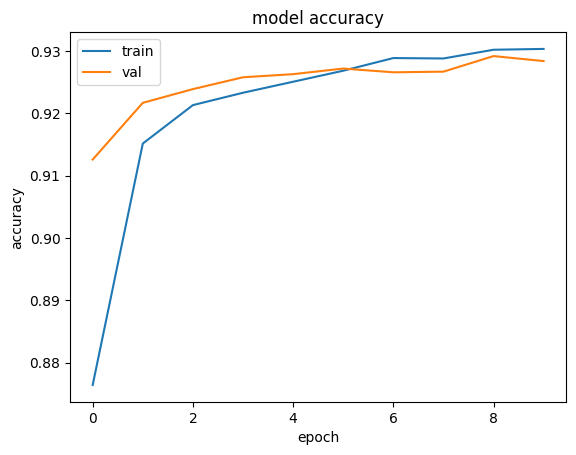

In [54]:
accuracy(history)

In [55]:
plot_curve(history)

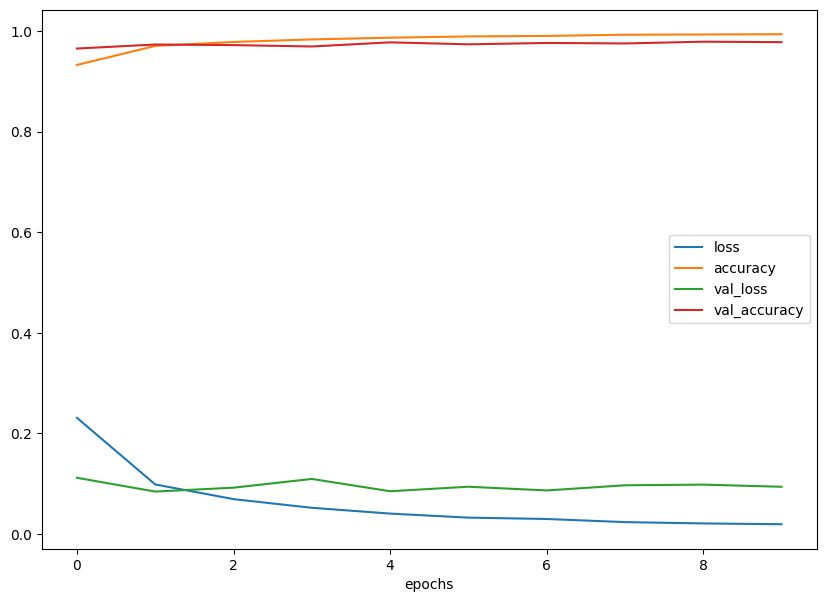

In [56]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

In [60]:
# Add Regularization / Dropout to reduce overfitting

from tensorflow.keras.regularizers import L2

opt_5 = Adam(learning_rate=0.001)

model_5 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(10, activation='softmax')])

model_5.compile(optimizer=opt_5, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_5.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5171 - accuracy: 0.9192 - val_loss: 0.3174 - val_accuracy: 0.9616
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3019 - accuracy: 0.9568 - val_loss: 0.2591 - val_accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2602 - accuracy: 0.9612 - val_loss: 0.2472 - val_accuracy: 0.9647
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2446 - accuracy: 0.9644 - val_loss: 0.2294 - val_accuracy: 0.9682
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2359 - accuracy: 0.9645 - val_loss: 0.2221 - val_accuracy: 0.9685
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2265 - accuracy: 0.9663 - val_loss: 0.2119 - val_accuracy: 0.9689
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2218 - accuracy: 0.9669 - val_loss: 0.2033 - val_accurac

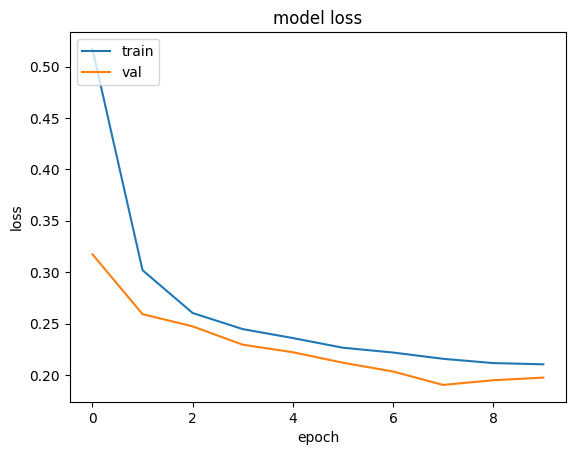

In [61]:
loss(history)

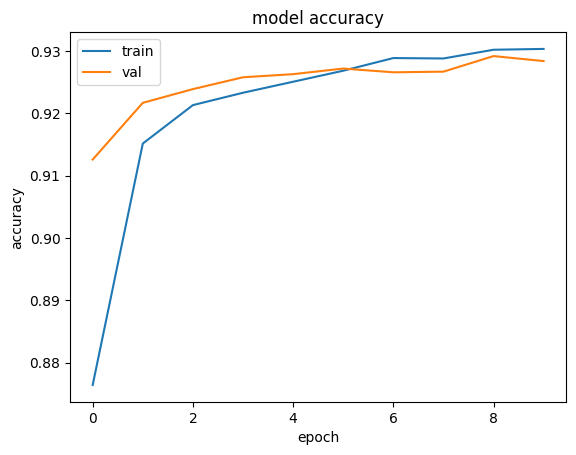

In [62]:
accuracy(history)

In [63]:
plot_curve(history)

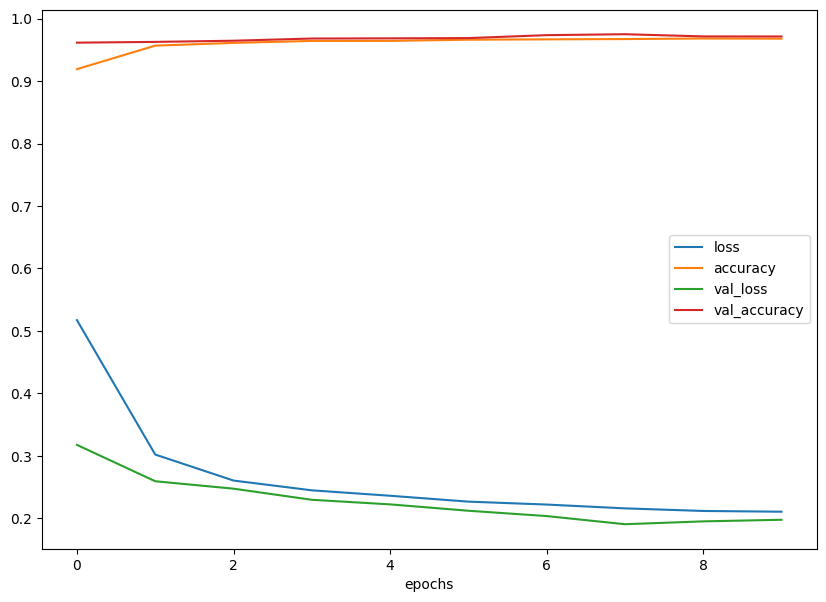

In [64]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

In [65]:
# Increase number of epochs

history = model_5.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2072 - accuracy: 0.9687 - val_loss: 0.2047 - val_accuracy: 0.9675
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2054 - accuracy: 0.9687 - val_loss: 0.2028 - val_accuracy: 0.9712
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2040 - accuracy: 0.9691 - val_loss: 0.1916 - val_accuracy: 0.9716
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2056 - accuracy: 0.9688 - val_loss: 0.2059 - val_accuracy: 0.9677
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1988 - accuracy: 0.9701 - val_loss: 0.2198 - val_accuracy: 0.9623
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2026 - accuracy: 0.9683 - val_loss: 0.2069 - val_accuracy: 0.9686
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2023 - accuracy: 0.9683 - val_loss: 0.1858 - val_ac

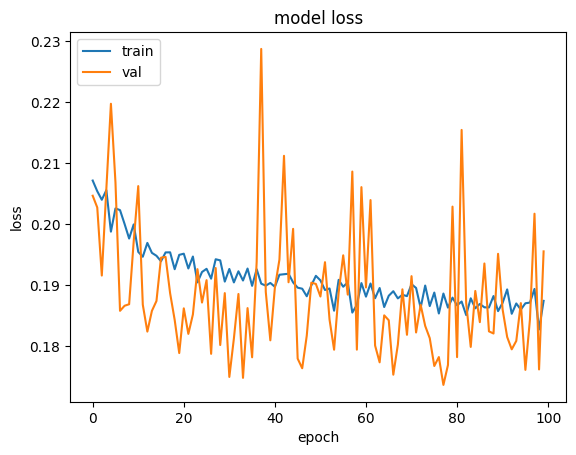

In [66]:
loss(history)

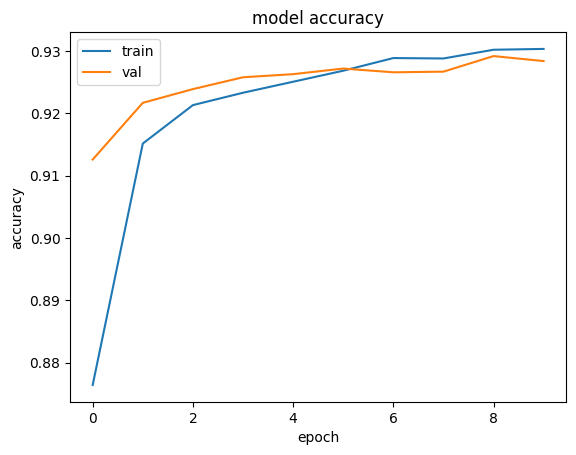

In [67]:
accuracy(history)

In [68]:
plot_curve(history)

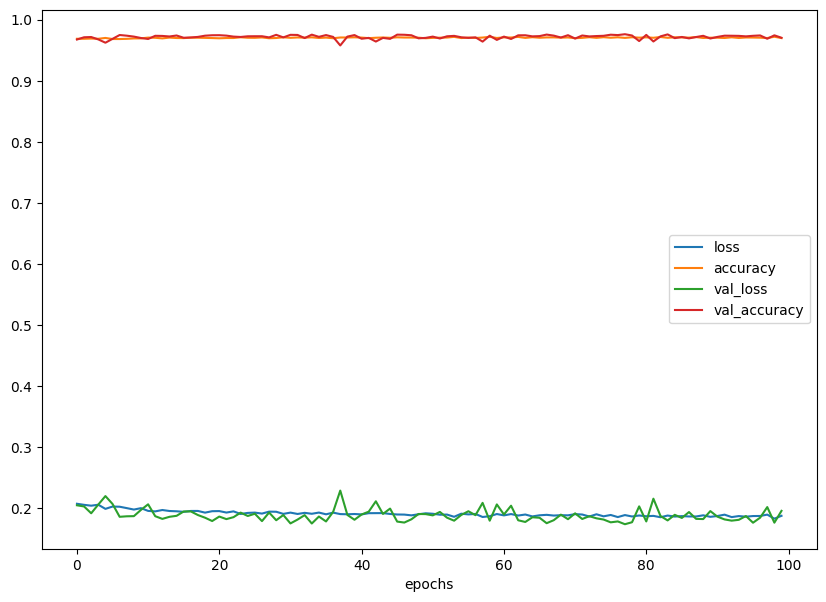

In [69]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");